In [1]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True) # activate latex text rendering

import numpy as np
import pandas as pd

from tqdm import tqdm

In [3]:
df = pd.read_csv("../data/clean_data.csv", sep=",", index_col=0)
df.head()

,id,title,area,interpretability,doi,source,working_doi,abstract,embedding,classifier_interpretability_prediction
0,main.8,Large Scale Multi-Actor Generative Dialog Mode...,Dialogue and Interactive Systems,False,10.18653/v1/2020.acl-main.8,ACL2020,True,Non-goal oriented dialog agents (i.e. chatbots...,[-5.58118939e-01 -1.25368834e-01 -6.33979887e-...,False
1,main.52,CDL: Curriculum Dual Learning for Emotion-Cont...,Dialogue and Interactive Systems,False,10.18653/v1/2020.acl-main.52,ACL2020,True,Emotion-controllable response generation is an...,[-1.12784958e+00 -5.22979379e-01 5.63119724e-...,False
2,main.46,Emergence of Syntax Needs Minimal Supervision,Theory and Formalism in NLP (Linguistic and Ma...,False,10.18653/v1/2020.acl-main.46,ACL2020,True,This paper is a theoretical contribution to th...,[ 2.61768043e-01 8.10616314e-01 2.74266422e-...,False
3,main.359,Selecting Backtranslated Data from Multiple So...,Machine Translation,False,10.18653/v1/2020.acl-main.359,ACL2020,True,Machine translation (MT) has benefited from us...,[-4.39277172e-01 1.06740630e+00 8.58952925e-...,False
4,main.417,ParaCrawl: Web-Scale Acquisition of Parallel C...,Resources and Evaluation,False,10.18653/v1/2020.acl-main.417,ACL2020,True,We report on methods to create the largest pub...,[-3.59388590e-01 3.36527884e-01 -2.65376344e-...,False


In [4]:
filter_2020 = df['source'].str.endswith('2020')
filter_2021 = df['source'].str.endswith('2021')
filter_2022 = df['source'].str.endswith('2022')
filter_2023 = df['source'].str.endswith('2023')
combined_filter = filter_2020 | filter_2021 | filter_2022 | filter_2023

post_2020_df = df[combined_filter]
post_2020_df.head()

,id,title,area,interpretability,doi,source,working_doi,abstract,embedding,classifier_interpretability_prediction
0,main.8,Large Scale Multi-Actor Generative Dialog Mode...,Dialogue and Interactive Systems,False,10.18653/v1/2020.acl-main.8,ACL2020,True,Non-goal oriented dialog agents (i.e. chatbots...,[-5.58118939e-01 -1.25368834e-01 -6.33979887e-...,False
1,main.52,CDL: Curriculum Dual Learning for Emotion-Cont...,Dialogue and Interactive Systems,False,10.18653/v1/2020.acl-main.52,ACL2020,True,Emotion-controllable response generation is an...,[-1.12784958e+00 -5.22979379e-01 5.63119724e-...,False
2,main.46,Emergence of Syntax Needs Minimal Supervision,Theory and Formalism in NLP (Linguistic and Ma...,False,10.18653/v1/2020.acl-main.46,ACL2020,True,This paper is a theoretical contribution to th...,[ 2.61768043e-01 8.10616314e-01 2.74266422e-...,False
3,main.359,Selecting Backtranslated Data from Multiple So...,Machine Translation,False,10.18653/v1/2020.acl-main.359,ACL2020,True,Machine translation (MT) has benefited from us...,[-4.39277172e-01 1.06740630e+00 8.58952925e-...,False
4,main.417,ParaCrawl: Web-Scale Acquisition of Parallel C...,Resources and Evaluation,False,10.18653/v1/2020.acl-main.417,ACL2020,True,We report on methods to create the largest pub...,[-3.59388590e-01 3.36527884e-01 -2.65376344e-...,False


In [5]:
# it is not clear whether these papers are from interpretability, as the track is
# "Language Modeling and Analysis of Language Models" and also
# they mixed areas in some of the time blocks where some papers were presented

set(post_2020_df[post_2020_df['interpretability'].isna()]['area'])

{'Interpretability and Analysis of Models for NLP; Language Generation',
 'Interpretability and Analysis of Models for NLP; Summarization',
 'Language Modeling and Analysis of Language Models'}

In [6]:
post_2020_df[post_2020_df['interpretability'] == True]['classifier_interpretability_prediction'].value_counts()

classifier_interpretability_prediction
True     224
False    131
Name: count, dtype: int64

In [7]:
post_2020_df.loc[:, 'year'] = post_2020_df['source'].apply(lambda x: int(x[-4:]))

post_2020_df                                            

/var/folders/jd/xcxq41xd1bx5jvgpwp14tr940000gn/T/ipykernel_55219/3417010343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_2020_df.loc[:, 'year'] = post_2020_df['source'].apply(lambda x: int(x[-4:]))


,id,title,area,interpretability,doi,source,working_doi,abstract,embedding,classifier_interpretability_prediction,year
0,main.8,Large Scale Multi-Actor Generative Dialog Mode...,Dialogue and Interactive Systems,False,10.18653/v1/2020.acl-main.8,ACL2020,True,Non-goal oriented dialog agents (i.e. chatbots...,[-5.58118939e-01 -1.25368834e-01 -6.33979887e-...,False,2020
1,main.52,CDL: Curriculum Dual Learning for Emotion-Cont...,Dialogue and Interactive Systems,False,10.18653/v1/2020.acl-main.52,ACL2020,True,Emotion-controllable response generation is an...,[-1.12784958e+00 -5.22979379e-01 5.63119724e-...,False,2020
2,main.46,Emergence of Syntax Needs Minimal Supervision,Theory and Formalism in NLP (Linguistic and Ma...,False,10.18653/v1/2020.acl-main.46,ACL2020,True,This paper is a theoretical contribution to th...,[ 2.61768043e-01 8.10616314e-01 2.74266422e-...,False,2020
3,main.359,Selecting Backtranslated Data from Multiple So...,Machine Translation,False,10.18653/v1/2020.acl-main.359,ACL2020,True,Machine translation (MT) has benefited from us...,[-4.39277172e-01 1.06740630e+00 8.58952925e-...,False,2020
4,main.417,ParaCrawl: Web-Scale Acquisition of Parallel C...,Resources and Evaluation,False,10.18653/v1/2020.acl-main.417,ACL2020,True,We report on methods to create the largest pub...,[-3.59388590e-01 3.36527884e-01 -2.65376344e-...,False,2020
...,...,...,...,...,...,...,...,...,...,...,...
8196,4608,PAR: Political Actor Representation Learning w...,NLP Applications,False,b4c9b57c0d9aacfa98db6247015def1826172bbd,EMNLP2022,True,Modeling the ideological perspectives of polit...,[-1.05176818e+00 1.95948914e-01 -1.77151358e+...,False,2022
8197,4613,JDDC 2.1: A Multimodal Chinese Dialogue Datase...,Resources and Evaluation,False,10.18653/v1/2022.emnlp-main.825,EMNLP2022,True,The popularity of multimodal dialogue has stim...,[-1.61390126e+00 -7.88330853e-01 -3.42035651e-...,False,2022
8198,4618,PCL: Peer-Contrastive Learning with Diverse Au...,"Semantics: Lexical, Sentence level, Textual In...",False,10.18653/v1/2022.emnlp-main.826,EMNLP2022,True,Learning sentence embeddings in an unsupervise...,[-5.13262928e-01 6.01322949e-03 -2.11887196e-...,False,2022
8199,4621,Digging Errors in NMT: Evaluating and Understa...,Machine Translation,False,10.18653/v1/2022.emnlp-main.827,EMNLP2022,True,Solid evaluation of neural machine translation...,[ 3.79095674e-01 -6.00754097e-03 -3.94643515e-...,False,2022


In [8]:
raw_tracks = set(post_2020_df['area'])

raw_tracks

{'Cognitive Modeling and Psycholinguistics',
 'Commonsense Reasoning',
 'Computational Social Science and Cultural Analytics',
 'Computational Social Science and Social Media',
 'Computational Social Science and Social Media; Language Generation',
 'Computational Social Science and Social Media; NLP Applications',
 'Computational Social Science and Social Media; Sentiment Analysis, Stylistic Analysis, and Argument Mining',
 'Demos',
 'Dialog and Interactive Systems',
 'Dialog and Interactive Systems; Discourse and Pragmatics',
 'Dialog and Interactive Systems; Linguistic Theories, Cognitive Modeling and Psycholinguistics',
 'Dialogue and Interactive Systems',
 'Discourse and Pragmatics',
 'Discourse and Pragmatics & Ethics in NLP',
 'Discourse and Pragmatics; Language Generation',
 'Discourse and Pragmatics; Machine Translation and Multilinguality',
 'Efficient Methods for NLP',
 'Ethic Concerns:Dialogue and Interactive Systems',
 'Ethic Concerns:Ethics',
 'Ethic Concerns:Linguistic Th

In [12]:
analysis_or_interpretability_tracks = list(filter(lambda x: 'interpretability' in x.lower() or 'analysis of language models' in x.lower(), raw_tracks))
print('interp & analysis tracks')
print(analysis_or_interpretability_tracks)
print()

syntax_tracks = list(filter(lambda x: 'syntax' in x.lower(), raw_tracks))
print('syntax tracks')
print(syntax_tracks)
print()

mt_tracks = list(filter(lambda x: 'translation' in x.lower(), raw_tracks))
print('MT tracks')
print(mt_tracks)
print()

grounding_tracks = list(filter(lambda x: 'grounding' in x.lower(), raw_tracks))
print('grounding tracks')
print(grounding_tracks)
print()

semantics_tracks = list(filter(lambda x: 'semantics' in x.lower(), raw_tracks))
print('semantics tracks')
print(semantics_tracks)
print()

evaluation_tracks = list(filter(lambda x: 'evaluation' in x.lower(), raw_tracks))
print('evaluation tracks')
print(evaluation_tracks)
print()

info_extraction_tracks = list(filter(lambda x: 'extraction' in x.lower(), raw_tracks))
print('info_extraction tracks')
print(info_extraction_tracks)
print()

qa_tracks = list(filter(lambda x: 'answering' in x.lower(), raw_tracks))
print('qa_tracks')
print(qa_tracks)
print()

dialogue_tracks = list(filter(lambda x: 'dialog' in x.lower(), raw_tracks))
print('dialogue_tracks')
print(dialogue_tracks)
print()

sentiment_analysis_tracks = list(filter(lambda x: 'sentiment analysis' in x.lower(), raw_tracks))
print('sentiment_analysis_tracks')
print(sentiment_analysis_tracks)
print()

interp & analysis tracks
['Interpretability and Analysis of Models for NLP', 'Interpretability and Analysis of Models for NLP; Language Generation', 'Language Modeling and Analysis of Language Models', 'Interpretability and Analysis of Models for NLP; Summarization', 'Interpretability, Interactivity and Analysis of Models for NLP', 'Interpretability, Interactivity, and Analysis of Models for NLP']

syntax tracks
['Syntax: Tagging, Chunking, and Parsing', 'Syntax: Tagging, Chunking and Parsing', 'Syntax, Parsing and their Applications']

MT tracks
['Discourse and Pragmatics; Machine Translation and Multilinguality', 'Machine Translation and Multilinguality', 'Machine Translation and Multilinguality; Phonology, Morphology and Word Segmentation', 'Machine Translation']

grounding tracks
['Speech, Vision, Robotics, Multimodal Grounding', 'Ethic Concerns:Speech, Vision, Robotics, Multimodal Grounding', 'Language Grounding to Vision, Robotics, and Beyond', 'Language Grounding to Vision, Robo

In [13]:
def raw_track_to_track(raw_track):
    if raw_track in analysis_or_interpretability_tracks:
        return 'Interpretability and Analysis'
    if raw_track in syntax_tracks:
        return 'Syntax'
    if raw_track in mt_tracks:
        return 'Machine Translation'
    if raw_track in grounding_tracks:
        return 'Grounding'
    if raw_track in semantics_tracks:
        return 'Semantics'
    if raw_track in evaluation_tracks:
        return 'Evaluation'
    if raw_track in info_extraction_tracks:
        return 'Information Extraction'
    if raw_track in qa_tracks:
        return 'Question Answering'
    if raw_track in dialogue_tracks:
        return 'Dialogue'
    if raw_track in sentiment_analysis_tracks:
        return 'Dialogue'
    return None


post_2020_df['track'] = post_2020_df['area'].apply(raw_track_to_track)
post_2020_df

/var/folders/jd/xcxq41xd1bx5jvgpwp14tr940000gn/T/ipykernel_55219/179709456.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_2020_df['track'] = post_2020_df['area'].apply(raw_track_to_track)


,id,title,area,interpretability,doi,source,working_doi,abstract,embedding,classifier_interpretability_prediction,year,track
0,main.8,Large Scale Multi-Actor Generative Dialog Mode...,Dialogue and Interactive Systems,False,10.18653/v1/2020.acl-main.8,ACL2020,True,Non-goal oriented dialog agents (i.e. chatbots...,[-5.58118939e-01 -1.25368834e-01 -6.33979887e-...,False,2020,Dialogue
1,main.52,CDL: Curriculum Dual Learning for Emotion-Cont...,Dialogue and Interactive Systems,False,10.18653/v1/2020.acl-main.52,ACL2020,True,Emotion-controllable response generation is an...,[-1.12784958e+00 -5.22979379e-01 5.63119724e-...,False,2020,Dialogue
2,main.46,Emergence of Syntax Needs Minimal Supervision,Theory and Formalism in NLP (Linguistic and Ma...,False,10.18653/v1/2020.acl-main.46,ACL2020,True,This paper is a theoretical contribution to th...,[ 2.61768043e-01 8.10616314e-01 2.74266422e-...,False,2020,None
3,main.359,Selecting Backtranslated Data from Multiple So...,Machine Translation,False,10.18653/v1/2020.acl-main.359,ACL2020,True,Machine translation (MT) has benefited from us...,[-4.39277172e-01 1.06740630e+00 8.58952925e-...,False,2020,Machine Translation
4,main.417,ParaCrawl: Web-Scale Acquisition of Parallel C...,Resources and Evaluation,False,10.18653/v1/2020.acl-main.417,ACL2020,True,We report on methods to create the largest pub...,[-3.59388590e-01 3.36527884e-01 -2.65376344e-...,False,2020,Evaluation
...,...,...,...,...,...,...,...,...,...,...,...,...
8196,4608,PAR: Political Actor Representation Learning w...,NLP Applications,False,b4c9b57c0d9aacfa98db6247015def1826172bbd,EMNLP2022,True,Modeling the ideological perspectives of polit...,[-1.05176818e+00 1.95948914e-01 -1.77151358e+...,False,2022,None
8197,4613,JDDC 2.1: A Multimodal Chinese Dialogue Datase...,Resources and Evaluation,False,10.18653/v1/2022.emnlp-main.825,EMNLP2022,True,The popularity of multimodal dialogue has stim...,[-1.61390126e+00 -7.88330853e-01 -3.42035651e-...,False,2022,Evaluation
8198,4618,PCL: Peer-Contrastive Learning with Diverse Au...,"Semantics: Lexical, Sentence level, Textual In...",False,10.18653/v1/2022.emnlp-main.826,EMNLP2022,True,Learning sentence embeddings in an unsupervise...,[-5.13262928e-01 6.01322949e-03 -2.11887196e-...,False,2022,Semantics
8199,4621,Digging Errors in NMT: Evaluating and Understa...,Machine Translation,False,10.18653/v1/2022.emnlp-main.827,EMNLP2022,True,Solid evaluation of neural machine translation...,[ 3.79095674e-01 -6.00754097e-03 -3.94643515e-...,False,2022,Machine Translation


In [14]:
all_tracks = list(set(post_2020_df['track']))

colors = plt.cm.get_cmap('tab20', len(all_tracks))
color_mapping = {track: colors(i) for i, track in enumerate(all_tracks)}


/var/folders/jd/xcxq41xd1bx5jvgpwp14tr940000gn/T/ipykernel_55219/3751896136.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(all_tracks))


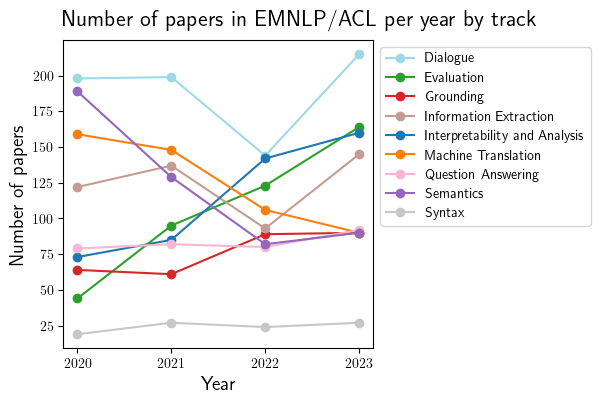

In [24]:
import matplotlib.ticker as ticker

count_data = post_2020_df.groupby('year')['track'].value_counts().unstack().fillna(0)


tracks = count_data.columns
fig, ax = plt.subplots(figsize=(4, 4))
for track in tracks:
    ax.plot(count_data.index, count_data[track], marker='o', color=color_mapping[track], label=track)

plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of papers', fontsize=14)
plt.title('Number of papers in EMNLP/ACL per year by track', fontsize=16, pad=10, loc='left')
plt.tight_layout
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


plt.show()


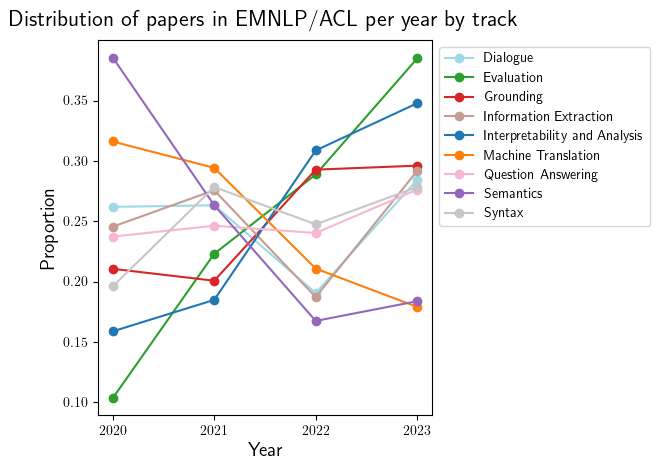

In [16]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

count_data = post_2020_df.groupby('year')['track'].value_counts().unstack().fillna(0)
normalized_data = count_data.div(count_data.sum(axis=0), axis=1)

tracks = normalized_data.columns
fig, ax = plt.subplots()
for track in tracks:
    ax.plot(normalized_data.index, normalized_data[track], marker='o', color=color_mapping[track], label=track)


plt.xlabel('Year', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.title('Distribution of papers in EMNLP/ACL per year by track', fontsize=16, pad=10)

plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


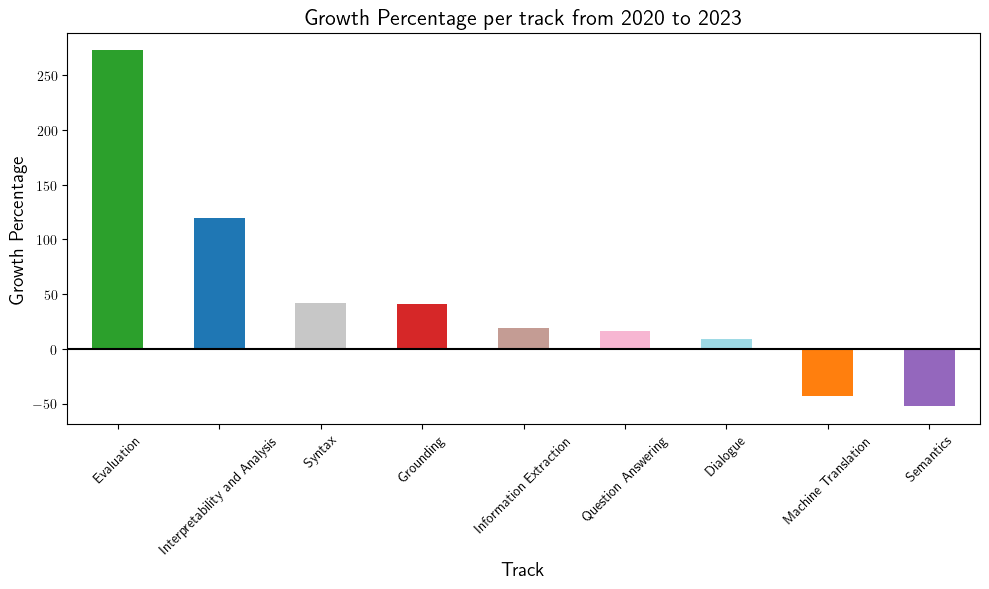

In [25]:
import matplotlib.pyplot as plt

data_2021 = count_data.loc[2020]
data_2023 = count_data.loc[2023]

growth_percentage = ((data_2023 - data_2021) / data_2021) * 100

sorted_growth = growth_percentage.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sorted_growth.plot(kind='bar', color=[color_mapping[track] for track in sorted_growth.index])

plt.xlabel('Track', fontsize=14)
plt.ylabel('Growth Percentage', fontsize=14)
plt.title('Growth Percentage per track from 2020 to 2023', fontsize=16)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.axhline(y=0, color='black', linewidth=1.5)
plt.tight_layout()
plt.savefig('growth_2020_to_2023.png')


In [18]:

post_2020_df['area'].value_counts().head(10)

area
Machine Learning for NLP                                       560
NLP Applications                                               488
Information Extraction                                         487
Resources and Evaluation                                       423
Question Answering                                             309
Dialogue and Interactive Systems                               299
Machine Translation and Multilinguality                        274
Sentiment Analysis, Stylistic Analysis, and Argument Mining    248
Interpretability and Analysis of Models for NLP                245
Summarization                                                  226
Name: count, dtype: int64